# **I. Logistic Regression**

***1. Khái niệm hồi quy logistic***

*Hồi quy tuyến tính* là là một giải thuật phân loại bằng cách học một hàm ước lượng xác suất $P(X|Y)$. Với giả thuyết trọng tâm rằng xác suất này có thể biểu diễn bằng một hàm $Sigmoid$ để đưa ra đánh giá xác suất dựa trên các thuộc tính đầu vào

Với 
$$ y = W^TX + B $$






***2. Mô hình***

Sử dụng phương pháp thống kê ta có thể coi rằng khả năng một đầu vào **X** nằm vào một nhóm *y0* là xác suất có điều kiện:

\begin{align}
        P(y_0 | X) &= \frac{P(X|y_0)P(y_0)}{P(X)} \\
        &= \frac{P(X|y_0)P(y_0)}{P(X|y_0)P(y_0) + P(X|y_1)P(y_1)}
    \end{align}

Đặt:
$$ α = \ln \frac{P(X|y_0)P(y_0)}{P(X|y_1)P(y_1)} $$

Khi đó:

$$P(y_0 | X) = \frac{1}{1 + exp(-a)} = σ(a)  $$

Hàm σ(a) ở đây là hàm sigmoid (sigmoid function)

---

***3. Hàm mất mát và phương pháp tối ưu*** 

**3.1 Xây dựng hàm mất mát**

Với mô hình như trên thì ta có thể giả sử rằng xác suất để một điểm dữ liệu **x** rơi vào class 1 là $f(WX + B)$ và rơi vào class 0 là $1 - f(WX + B)$. Với mô hình được giả sử như vậy, ta có thể viết như sau:
$$P(y_i = 1 | X_i; W) = f(W^TX_1 + B)$$

$$P(y_i = 0 | X_i; W) = 1 - f(W^TX_1 + B)$$

Trong đó thì $P(y_i = 1 | X_i; W)$ được hiểu là xác suất xảy ra sự kiện đầu ra $y = 1$ khi biết được tham số mô hình $W$, $B$ và dữ liệu đầu vào $X_i$. Bên cạnh đó thì mục tiêu của chúng ta là tìm các hệ số $W$, $B$ sao cho $f(WX_1 + B)$ có sai số thấp nhất có thể.

Ta sử dụng ước lượng theo hàm $log$ để tìm $W$ và $B$

$\begin{align}J(W) =  - \frac{1}{N} log P(y |X; W) = - \frac{1}{m} \sum_{i = 1}^{m}(y^{(i)}logσ^{(i)} + (1 - y^{(i)})log(1-σ^{(i)})  \end{align}$

Trong đó, $m$ là kích cỡ của tập dữ liệu, $y^{(i)}$ lớp tương ứng của dữ liệu, $σ^{(i)} = σ(W^TX+B)$ là xác suất tương ứng khi tính với mô hình cho dữ liệu thứ $i$

**3.2 Tối ưu hàm mất mát**

*3.2.1 Gradient Descent*

Để tối ưu hàm $J(W)$ trên, ta sử dụng phương pháp Gradient Descent để thực hiện tối ưu. Ở đây đạo hàm của hàm $log$ được tính như sau:

$$\frac{∂J}{∂W} = [σ(W^TX+B) - y]X$$

$$\frac{∂J}{∂B} = [σ(W^TX+B) - y]$$

$$B = B - α.\frac{∂J}{∂B} $$
$$B = B - α.\frac{∂J}{∂B} $$

**Quy ước**
$$J = - \frac{1}{m} \sum_{i = 1}^{m}(y^{(i)}logσ^{(i)} + (1 - y^{(i)})log(1-σ^{(i)})$$
$$a = σ(z) = \frac{1}{1 + e^{-z}}$$

$$z = W^TX + B$$

**Tính gradient descent theo W**
$$\frac{∂J}{∂W} = \frac{∂J}{∂a}.\frac{∂a}{∂z}.\frac{∂z}{∂W} $$

$$\frac{∂J}{∂a} = \frac{-y}{a} + \frac{1-y}{1-a} = \frac{a - y}{a(1-a)}$$

$$\frac{∂a}{∂z} = (1 + e^{-z})^{-1} = \frac{e^{-z}}{(1+e^{-z})^2} = \frac{a^2(1-a)}{a} = a(1-a) $$

$$\frac{∂z}{∂W} = X $$

⇒$$\frac{∂J}{∂W} = (a - y)X $$

**Tính gradient descent theo B**
$$\frac{∂J}{∂B} = \frac{∂J}{∂a}.\frac{∂a}{∂z}.\frac{∂z}{∂B} $$

$$\frac{∂J}{∂a} = \frac{-y}{a} + \frac{1-y}{1-a} = \frac{a - y}{a(1-a)}$$

$$\frac{∂a}{∂z} = (1 + e^{-z})^{-1} = \frac{e^{-z}}{(1+e^{-z})^2} = \frac{a^2(1-a)}{a} = a(1-a) $$

$$\frac{∂z}{∂B} = 1 $$

⇒$$\frac{∂J}{∂B} = a - y $$

*3.2.2 Gradient Descent với Adam optimizer - Adaptive Moment Estimation optimizer*

Adam optimizer là một thuật toán kết hợp kỹ thuật của RMS prop và momentum. Thuật toán sử dụng hai internal states momentum (m) và squared momentum (v) của gradient cho các tham số. Sau mỗi batch huấn luyện, giá trị của m và v được cập nhật lại sử dụng exponential weighted averaging.

Việc cập nhật $m$ và $v$ theo công thức:
$$m_t = β_1m_t + (1-β_1)g_t $$
$$v_t = β_2v_t + (1-β_2)g_t^2 $$

trong đó β được coi là siêu tham số. Với công thức cập nhật $θ$ như sau:
$θ_t = θ_{t-1} - α \frac{m_t}{\sqrt{v_t} + ϵ}$

trong đó $α$ là learning rate, $ϵ$ là tham số thêm vào để ngăn việc chia cho $0$

Về mặt vật lý adam giống như một quả cầu rất nặng và có ma sát lăn xuống dốc, vậy nên nó có thể dễ dàng vượt qua local minimum và đạt tới global minimum 


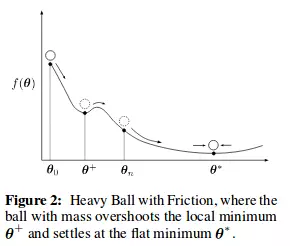

Ta có thể hình dung được tốc độ giảm loss của từng phương pháp tối ưu qua bảng phía dưới

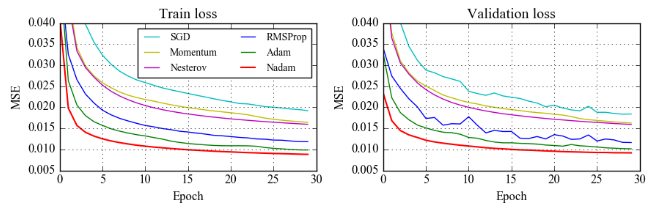

# **Implementation**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.metrics import classification_report

In [ ]:
X_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI Project/cleaned_train.csv").drop(['satisfaction'],axis = 1)
Y_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI Project/cleaned_train.csv")['satisfaction']
X_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI Project/cleaned_test.csv").drop(['satisfaction'],axis = 1)
Y_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI Project/cleaned_test.csv")['satisfaction']

In [ ]:
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values

In [ ]:
print(X_train)

In [ ]:
X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])

In [ ]:
class logisticRegesstion:
    def __init__(self, learning_rate=0.001, iterations=10000, W=None, B=None):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.W = W
        self.B = B

    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))

    def fit(self, X, Y):
        cost_list = []
        m = X.shape[1]
        n = X.shape[0]

        self.W = np.zeros((n, 1))
        self.B = 0

        for i in range(self.iterations):

            Z = np.dot(self.W.T, X) + self.B
            A = self.sigmoid(Z)

            # cost function
            cost = -(1/m)*np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))

            # Gradient Descent
            dW = (1/m)*np.dot(A-Y, X.T)
            dB = (1/m)*np.sum(A - Y)

            self.W = self.W - self.learning_rate*dW.T
            self.B = self.B - self.learning_rate*dB

            # Keeping track of our cost function value
            cost_list.append(cost)

            if(i % (self.iterations/10) == 0):
                print("cost after ", i, "iteration is : ", cost)

    def predict(self, X):
        return np.round(self.sigmoid(X.T.dot(self.W)+self.B))

    def adamFit(self, X, y):
        self.W = np.zeros((X.shape[0], 1))
        self.B = 0

        m_W, v_W = np.zeros((X.shape[0], 1)), np.zeros((X.shape[0], 1))
        alpha_W, beta1_W, beta2_W, eps = 0.001, 0.9, 0.999, 1e-8

        m_B, v_B = 0.0, 0.0
        alpha_B, beta1_B, beta2_B, eps = 0.001, 0.9, 0.999, 1e-10


        cost_list = []

        for i in range(self.iterations):
            Z = np.dot(self.W.T, X) + self.B
            A = self.sigmoid(Z)

            cost = -(1/X.shape[1])*np.sum(y*np.log(A) + (1-y)*np.log(1-A))

            # Compute derivative of gradient descent
            dW = ((1/X.shape[1])*np.dot(A-y, X.T)).T

            dB = (1/X.shape[1])*np.sum(A - y)

            # For weight
            # Calculate momentum 2
            m_W = beta1_W * m_W + (1.0 - beta1_W) * dW
            # Calculate momentum 2
            v_W = beta2_W * v_W + (1.0 - beta2_W) * dW**2
            mhat_W = m_W / (1.0 - beta1_W**(eps + 1.0))
            vhat_W = v_W / (1.0 - beta2_W**(eps + 1.0))
            self.W = self.W - alpha_W * mhat_W / (np.sqrt(vhat_W) + eps)

            # For Bias
            # Calculate momentum 1
            m_B = beta1_B * m_B + (1.0 - beta1_B) * dB
            # Calculate momentum 2
            v_B = beta2_B * v_B + (1.0 - beta2_B) * dB**2
            mhat_B = m_B / (1.0 - beta1_B**(eps + 1.0))
            vhat_B = v_B / (1.0 - beta2_B**(eps + 1.0))
            self.B = self.B - alpha_B * mhat_B / (np.sqrt(vhat_B) + eps)
            
            # Keeping track of our cost function value
            cost_list.append(cost)

            if(i % (self.iterations/10) == 0):
                print("cost after ", i, "iteration is : ", cost)
        


In [ ]:
lr1 = logisticRegesstion(learning_rate = 0.001, iterations = 30000)
lr2 = logisticRegesstion(learning_rate = 0.001, iterations = 30000)

**Training**

In [ ]:
lr1.fit(X_train, Y_train)


cost after  0 iteration is :  0.6931471805599453
cost after  3000 iteration is :  0.5828780636160225
cost after  6000 iteration is :  0.5490529122966412
cost after  9000 iteration is :  0.5301263211708127
cost after  12000 iteration is :  0.5160121172227867
cost after  15000 iteration is :  0.5042687143976233
cost after  18000 iteration is :  0.494076580096776
cost after  21000 iteration is :  0.4850612730922892
cost after  24000 iteration is :  0.477002475082276
cost after  27000 iteration is :  0.46974762454976327


In [ ]:
lr2.adamFit(X = X_train,y = Y_train)

cost after  0 iteration is :  0.6931471805599453
cost after  3000 iteration is :  0.4275137088364902
cost after  6000 iteration is :  0.3930348681098858
cost after  9000 iteration is :  0.37786770055073327
cost after  12000 iteration is :  0.36662669336733783
cost after  15000 iteration is :  0.35750403133434333
cost after  18000 iteration is :  0.35045379089783635
cost after  21000 iteration is :  0.34526620082389203
cost after  24000 iteration is :  0.3417271787938454
cost after  27000 iteration is :  0.3396136550332389


**Validating**

***Logistic Regression với gradient descent***

In [ ]:
print(classification_report(Y_test.T, lr1.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82     14573
         1.0       0.76      0.78      0.77     11403

    accuracy                           0.80     25976
   macro avg       0.80      0.80      0.80     25976
weighted avg       0.80      0.80      0.80     25976



***Logistic Regression với gradient descent được tối ưu bằng Adam***

In [ ]:
print(classification_report(Y_test.T, lr2.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89     14573
         1.0       0.87      0.83      0.85     11403

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



**Confusion Matrix Evaluation**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

*Normal Gradient Descent*

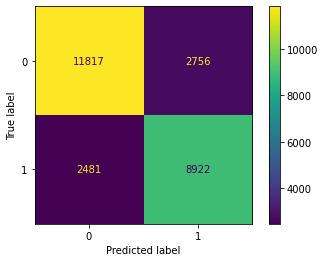

In [ ]:
predictions = (lr1.predict(X_test))
cm = confusion_matrix(Y_test.T, predictions, labels=np.array([0, 1]))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.array(['0', '1']))
disp.plot()
plt.show()

*Gradient Descent Optimized with Adam*

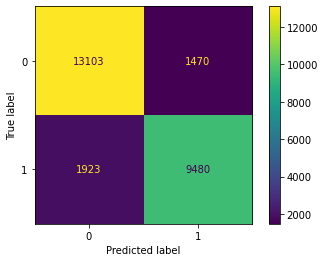

In [ ]:
predictions = (lr2.predict(X_test))
cm = confusion_matrix(Y_test.T, predictions, labels=np.array([0, 1]))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.array(['0', '1']))
disp.plot()
plt.show()

# **Compare to build-in model**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf1 = LogisticRegression(max_iter=100, random_state = 42).fit(X_train.T, Y_train.reshape(X_train.shape[1]))

In [ ]:
print(classification_report(Y_test.T, clf1.predict(X_test.T)))

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89     14573
         1.0       0.87      0.83      0.85     11403

    accuracy                           0.87     25976
   macro avg       0.87      0.86      0.87     25976
weighted avg       0.87      0.87      0.87     25976



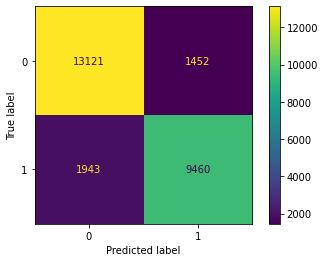

In [ ]:
predictions = (clf1.predict(X_test.T)).reshape(1,Y_test.shape[1])
cm = confusion_matrix(Y_test.T, predictions.T, labels=np.array([0, 1]))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.array(['0', '1']))
disp.plot()
plt.show()